<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/NEO_Classification_Preprocessed_Data_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 4 CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's lecture video and Example, and the references listed at the bottom of the document)

To ensure the correct data was being used, I added on to the previous assignment.

# Assignment 4: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Removing Missing Values:

The dataset I will be using is Near Earth Objects (NEO). The dataset doesn't appear to contain significant amounts of data issues, but I will try to use the provided code examples to ensure I am using clean data. The following lines of code imports the dataset and establishes the column names that the data will be presented under.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/neo_namesremoved.csv', header=None)
data.columns = ['id', 'Name', 'est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object','absolute_magnitude', 'hazardous']

print('Total Number of Records:  %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records:  90836
Total Number of Features: 10


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will check the dataset for missing values. The dataset I am using does not appear to have any missing values.

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 90836
Total Number of Features: 10
Total Number of missing values:

id: 0

Name: 0

est_diameter_min: 0

est_diameter_max: 0

relative_velocity: 0

miss_distance: 0

orbiting_body: 0

sentry_object: 0

absolute_magnitude: 0

hazardous: 0


The next line of code is an additional way to check for missing data. Again, the results display no missing data.

In [3]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))
data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 90836
Total number of rows after dropping missing values: 90836


#Checking for Outliers:

First, I will display the first five rows of the data I am checking.

In [4]:
data2.head()

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will use box plots to check for any outliers. It's important to remember to drop any non-numeric datatypes prior to plotting the data.

In [5]:
%matplotlib inline

data2 = data.drop(['Name','orbiting_body','sentry_object','hazardous'],axis=1)
data2.dtypes


id                      int64
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
dtype: object

After removing the columns that contained strings, each column contains numeric values.

<Axes: >

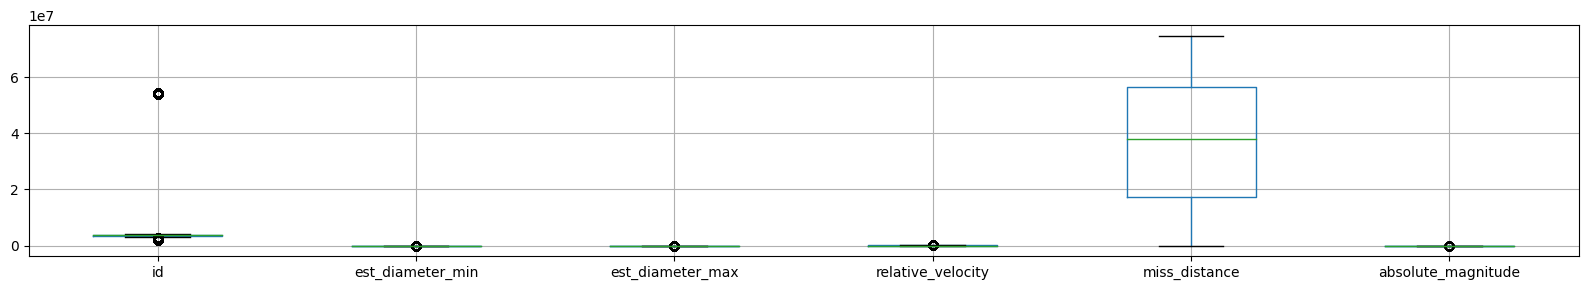

In [6]:
data2.boxplot(figsize=(20,3))

When evaluating the boxplot listed above, the only outlier appears to be in the id column. I will attempt to resolve it with the following lines of code:

In [7]:
Z = (data2-data2.mean())/data2.std()
Z[1:90836]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
1,-0.579982,0.463527,0.463527,1.009034,1.090351,-1.218728
2,-0.568734,1.991876,1.991876,2.616969,0.569620,-1.968533
3,-0.516809,-0.103601,-0.103601,-0.921296,-0.520381,-0.458557
4,-0.513403,0.427376,0.427376,-0.210696,0.411999,-1.187630
5,1.904742,-0.305107,-0.305107,-0.544387,0.157442,0.273971
...,...,...,...,...,...,...
90831,-0.508793,-0.337850,-0.337850,0.158618,-1.108004,0.508933
90832,-0.505235,-0.370711,-0.370711,-0.077187,0.771950,0.854466
90833,1.898921,-0.319840,-0.319840,-1.601219,-0.387695,0.370720
90834,1.903647,-0.402368,-0.402368,0.835488,1.414883,1.476424


In [8]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Total number of rows after removing outliers: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 90836
Total number of rows after removing outliers: 0


As you can see, it didn't appear to remove any outliers that exceeded the minimum and maximum values.

#Checking for Duplicates:

First, I will check for duplicates.

In [9]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 0


As you can see, there were no duplicates.

#Sampling:

First, I will display the first five rows of data.

In [10]:
data.head()

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


Next, I will sample the data randomly choosing three rows.

In [11]:
sample = data.sample(n=3)
sample

,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
50805,3789602,(2017 WS12),0.060891,0.136157,19315.80729,24327700.46,Earth,False,23.2,False
59388,3644703,(2013 NU),0.146068,0.326618,14707.63509,55363161.96,Earth,False,21.3,False
45162,3840759,(2019 GE),0.012722,0.028447,72083.07650,46517669.33,Earth,False,26.6,False


Next, I will sample the data at one percent without replacement.

In [12]:
sample = data.sample(frac=0.01, random_state=1)
sample


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
12801,3663258,(2014 EL),0.010582,0.023661,67869.92523,3.379682e+07,Earth,False,27.00,False
55325,3831894,(2018 UH1),0.025384,0.056760,46806.04991,2.042376e+06,Earth,False,25.10,False
2647,3552664,(2010 WC9),0.053034,0.118588,73992.58886,4.700788e+07,Earth,False,23.50,False
48068,3843919,(2019 SU1),0.005553,0.012418,10954.65422,2.392963e+07,Earth,False,28.40,False
41662,2511684,511684 (2015 BN509),0.183044,0.409298,96979.03827,4.103778e+07,Earth,False,20.81,True
...,...,...,...,...,...,...,...,...,...,...
12936,3515380,(2010 GL23),0.073207,0.163697,52851.13755,2.201863e+07,Earth,False,22.80,False
10437,3394754,(2007 VF189),0.005815,0.013003,30272.62582,6.758285e+07,Earth,False,28.30,False
8074,3703074,(2014 YT15),0.009651,0.021579,15404.67801,3.976412e+07,Earth,False,27.20,False
54568,3719245,(2015 KF),0.025384,0.056760,33467.42420,3.121676e+07,Earth,False,25.10,False


Next, I will sample the data at one percent with replacement to evaluate the results.

In [13]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,id,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
77708,3878564,(2019 TP1),0.160160,0.358129,84840.24857,7.194800e+07,Earth,False,21.10,True
5192,3758270,(2016 QE45),0.117099,0.261842,58978.62703,2.326581e+06,Earth,False,21.78,True
50057,3781911,(2017 SL17),0.105817,0.236614,51161.60720,1.619446e+07,Earth,False,22.00,True
73349,54114207,(2021 CE5),0.021113,0.047211,55483.58092,1.806974e+07,Earth,False,25.50,False
21440,3471585,(2009 UC),0.012722,0.028447,48802.95901,9.377322e+06,Earth,False,26.60,False
...,...,...,...,...,...,...,...,...,...,...
32293,3704767,(2015 BE92),0.006376,0.014257,72451.27247,6.887751e+07,Earth,False,28.10,False
70831,2455199,455199 (2000 YK4),0.291444,0.651688,48766.26520,5.859091e+07,Earth,False,19.80,False
27988,3465283,(2009 OY7),0.029144,0.065169,55905.74198,5.448388e+06,Earth,False,24.80,False
28431,54196397,(2021 RG14),0.046404,0.103762,17019.39089,7.271360e+07,Earth,False,23.79,False


#Findings:

The classification dataset I chose had mostly clean data. The dataset didn’t contain missing data. It also didn’t contain any outliers, other than the id column which contained non-measured data. The dataset didn’t contain duplicates, and the results from sampling confirmed the previously mentioned results when randomly sampling the data.

#Assignment 4 Beginning

#Univariate, Bivariate, and Multivariate Data Analysis Meanings

According to aditya191251015002,

$Univariate$ $Analysis$ is, "a type of data visualization where we visualize only a single variable at a time"(geeksforgeeks, 2022).

$Bivariate$ $Analysis$ is, "the simulatneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences"(geeksforgeeks, 2022).

$Multivariate$ $Analysis$ is, "an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them"(geeksforgeeks, 2022).


#Univariate Analysis (Continuous and Categorical Variables):



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

First, I will start by calculating the mean, standard deviation, minimum, and maximum values to analyze specific values.

In [15]:
from pandas.api.types import is_numeric_dtype


for col in data2.columns:
    if is_numeric_dtype(data2[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data2[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data2[col].min())
        print('\t Maximum = %.2f' % data2[col].max())

id:
	 Mean = 14382878.05
	 Standard deviation = 20872018.35
	 Minimum = 2000433.00
	 Maximum = 54275914.00
est_diameter_min:
	 Mean = 0.13
	 Standard deviation = 0.30
	 Minimum = 0.00
	 Maximum = 37.89
est_diameter_max:
	 Mean = 0.28
	 Standard deviation = 0.67
	 Minimum = 0.00
	 Maximum = 84.73
relative_velocity:
	 Mean = 48066.92
	 Standard deviation = 25293.30
	 Minimum = 203.35
	 Maximum = 236990.13
miss_distance:
	 Mean = 37066546.03
	 Standard deviation = 22352040.60
	 Minimum = 6745.53
	 Maximum = 74798651.45
absolute_magnitude:
	 Mean = 23.53
	 Standard deviation = 2.89
	 Minimum = 9.23
	 Maximum = 33.20


Next, I will print the features with their data type to use for the code following it.

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


Next, I will use a histogram to perform Univariate Analysis on continuous variables.

<Axes: xlabel='id', ylabel='Count'>

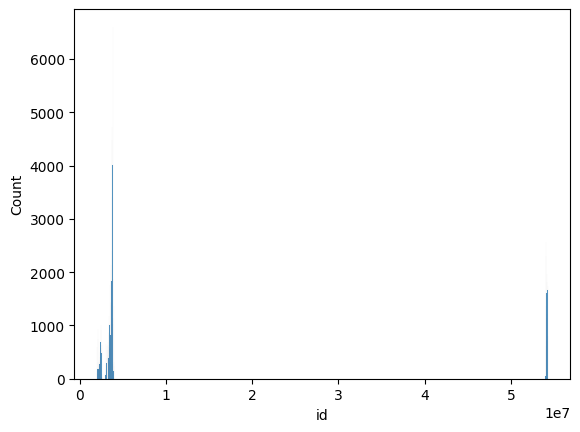

In [17]:
sns.histplot(data2['id'])

<Axes: xlabel='est_diameter_min', ylabel='Count'>

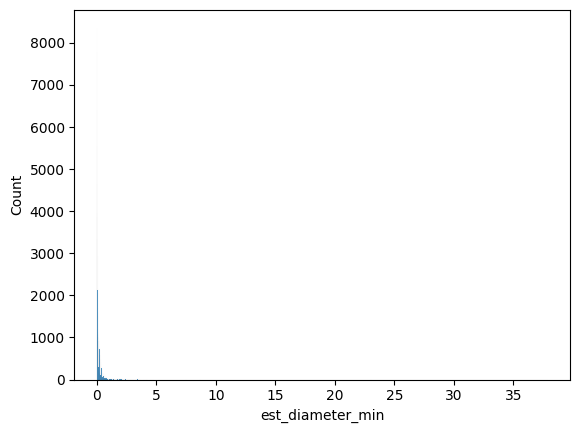

In [18]:
sns.histplot(data2['est_diameter_min'])

<Axes: xlabel='est_diameter_max', ylabel='Count'>

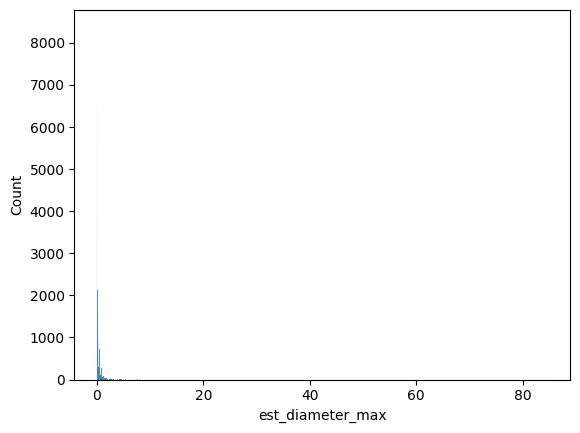

In [19]:
sns.histplot(data2['est_diameter_max'])

<Axes: xlabel='relative_velocity', ylabel='Count'>

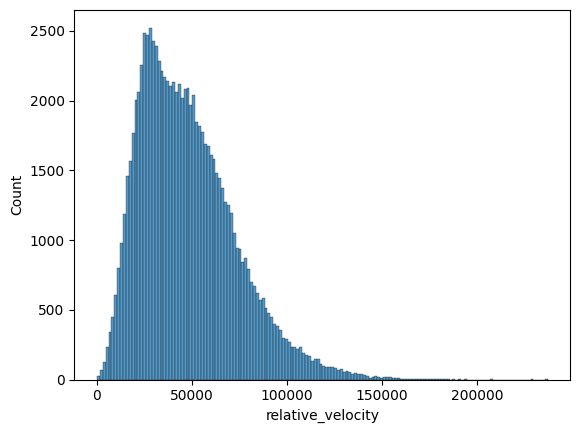

In [20]:
sns.histplot(data2['relative_velocity'])

<Axes: xlabel='miss_distance', ylabel='Count'>

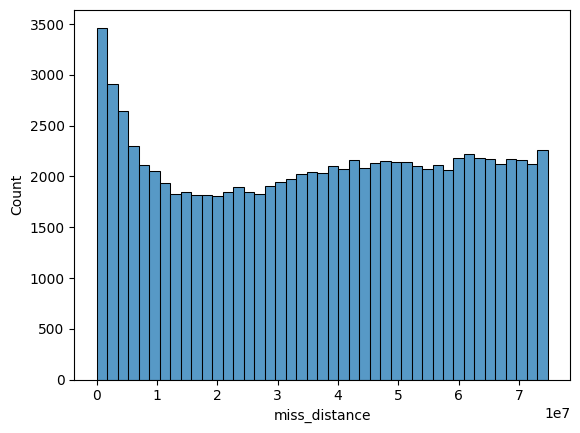

In [21]:
sns.histplot(data2['miss_distance'])

<Axes: xlabel='absolute_magnitude', ylabel='Count'>

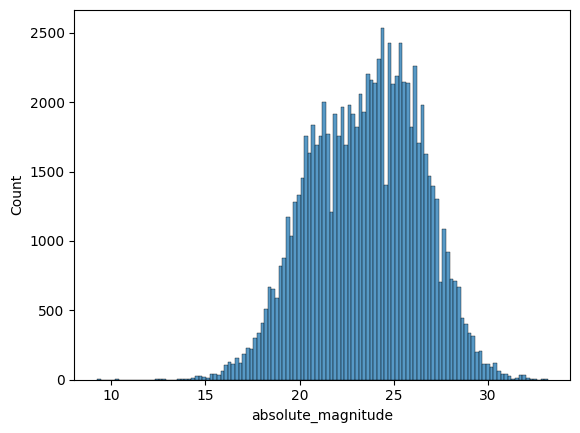

In [22]:
sns.histplot(data2['absolute_magnitude'])

Next, I will check for ensure there are no duplicated values.

In [39]:
data2.duplicated().sum()

0

Next, I will use the $value$ $counts$ function to analyze the categorical data in the dataset. I will first display the data to check the data types.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   Name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [25]:
data['Name'].value_counts()

469219 Kamo`oalewa (2016 HO3)    43
277810 (2006 FV35)               43
(2016 CA138)                     40
138175 (2000 EE104)              39
(2019 XS)                        38
                                 ..
(2017 CS)                         1
(2017 KJ3)                        1
(2017 OA20)                       1
(2017 KK27)                       1
(1999 LV7)                        1
Name: Name, Length: 27423, dtype: int64

In [26]:
data['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [27]:
data['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [28]:
data['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

Next, I will use the describe function to display attributes and some of their common statistical values.

In [29]:
data2.describe(include='all')

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346432,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020648,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604635,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128100,7.479865e+07,33.200000


Next, I will use a bar chart to analyze a continuous variable.

<Axes: >

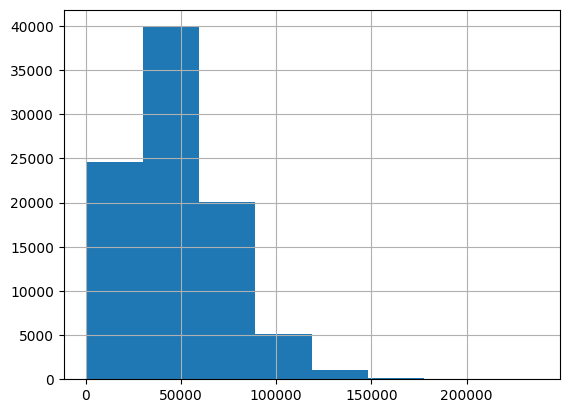

In [30]:
%matplotlib inline

data2['relative_velocity'].hist(bins=8)

#Bivariate Analysis

The next line of code uses covariance and correlation to compare multiple variables.

In [31]:
print('Covariance:')
data2.cov()

Covariance:


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
id,4.356412e+14,-924127.893676,-2.066413e+06,-3.124015e+10,-2.636387e+13,1.674791e+07
est_diameter_min,-9.241279e+05,0.089109,1.992537e-01,1.672801e+03,9.490816e+05,-4.839563e-01
est_diameter_max,-2.066413e+06,0.199254,4.455448e-01,3.740498e+03,2.122211e+06,-1.082159e+00
relative_velocity,-3.124015e+10,1672.801452,3.740498e+03,6.397509e+08,1.849675e+11,-2.590309e+04
miss_distance,-2.636387e+13,949081.577441,2.122211e+06,1.849675e+11,4.996137e+14,-1.708869e+07
absolute_magnitude,1.674791e+07,-0.483956,-1.082159e+00,-2.590309e+04,-1.708869e+07,8.375731e+00


In [32]:
print('Correlation:')
data2.corr()

Correlation:


,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,0.277258
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,-0.353863
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,-0.264168
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,1.000000


First, I will display the data along with its data type.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   Name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Next, I will make a third data set with a few additional features removed using the data drop function for analysis later on.

In [34]:
data3=data.drop(['id','est_diameter_min','est_diameter_max','relative_velocity','miss_distance','sentry_object','absolute_magnitude','hazardous','orbiting_body','Name'],axis=1)

##Continuous vs. Continuous

Next, I will use scatter plots to compare two features.



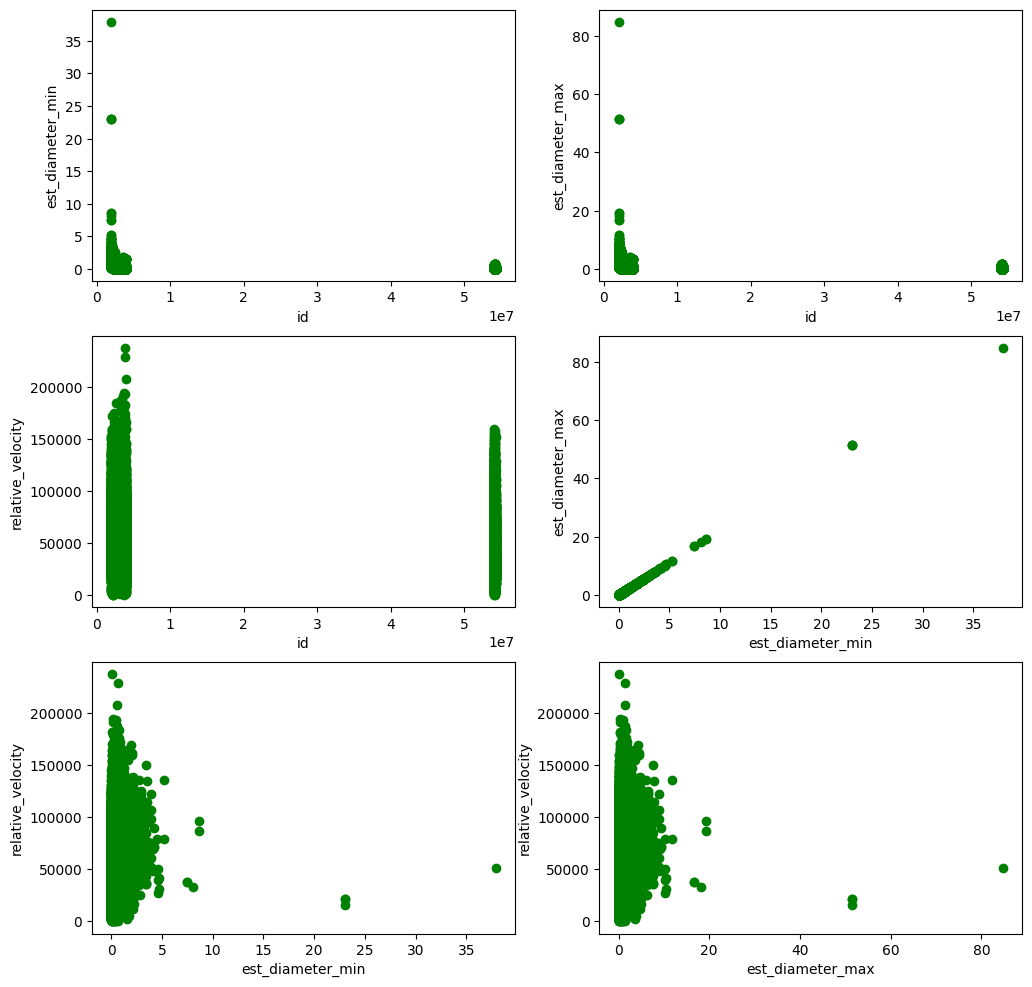

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data2[data2.columns[i]], data2[data2.columns[j]], color='green')
        axes[ax1][ax2].set_xlabel(data2.columns[i])
        axes[ax1][ax2].set_ylabel(data2.columns[j])
        index = index + 1

###Categorical vs Categorical

Next, I will use a KDE plot to compare two categorical values.

<Axes: xlabel='id', ylabel='Density'>

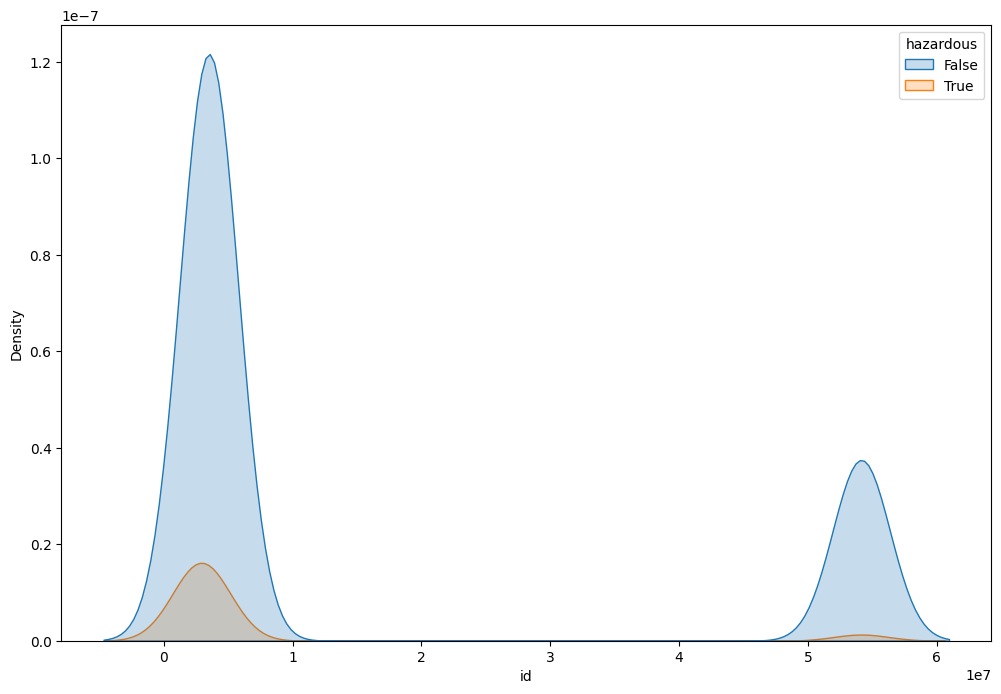

In [36]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='id', hue='hazardous',fill=True)

Next, I will use box plot to see if any values are unequally distributed.

<Axes: >

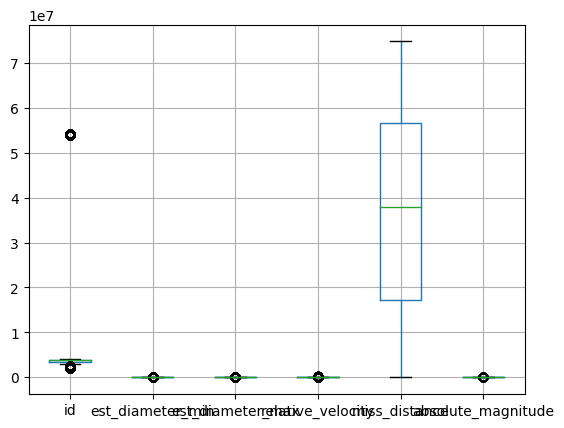

In [37]:
data2.boxplot()

#Multivariate Analysis:

Lastly, I will use a heat map to display multiple variables at the same time to analyze their comparisons.

<ipython-input-38-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

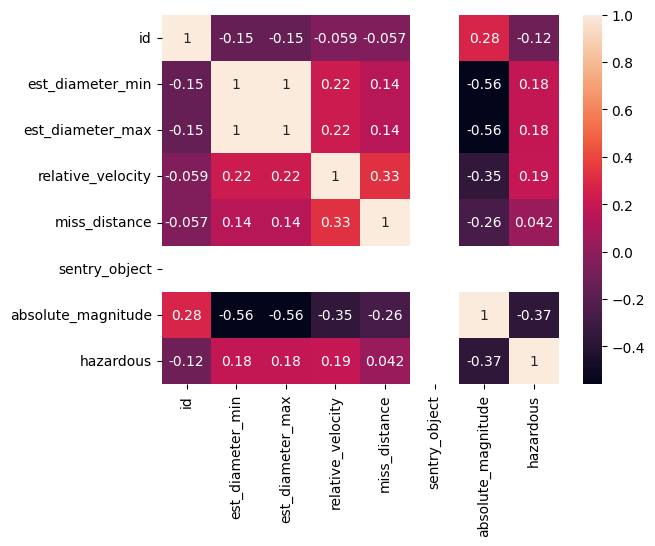

In [38]:
sns.heatmap(data.corr(), annot=True)

#Findings:

  When using visual representations of the data, it's easy to identify how specific features and attributes correlate. For instance, when examining categorical values using the KDE plot, it's easy to distinguish which values there are more of. It also makes it easier to identify which features share similar values. Using histograms proved to be a useful way to analyze the data visually when using individual features.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's example: https://blackboard.ecok.edu/ultra/courses/_24357_1/cl/outline

aditya191251015002. (2022, November 7). What is Univariate, Bivariate &amp; Multivariate Analysis In Data Visualisation?. GeeksforGeeks. https://www.geeksforgeeks.org/what-is-univariate-bivariate-multivariate-analysis-in-data-visualisation/

Medium.com: https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173